In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../datageneration')
from heatconduction2d import main
from randompolynomials import randompoly1DO3, randompoly2DO3

In [17]:
params = {'inputdata': 'poly',
             'nelems': 32,
             'etype': 'square',
             'btype': 'spline',
             'basisdegree': 1,
             'intdegree': 2,
             'nfemsamples': 2,
             'noutputnodes': 100}

c_theta = np.random.uniform(-0.1, 0.1, 10)
c_f = np.random.uniform(-0.1, 0.1, 10)
c_etab = np.random.uniform(-0.1, 0.1, 4)
c_etat = np.random.uniform(-0.1, 0.1, 4)

theta = randompoly2DO3(c_theta)
f = randompoly2DO3(c_f)
etab = randompoly1DO3(c_etab)
etat = randompoly1DO3(c_etat)
gl = 0
gr = 0

inputs = {'theta': theta,
          'f': f,
          'etab': etab,
          'etat': etat,
          'gl': gl,
          'gr': gr}

outputs = main(params, inputs, save=True, savedir='../../../trainingdata', label='test')

x = outputs['x']
u = outputs['u']

optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 1e-16


(4096, 2)

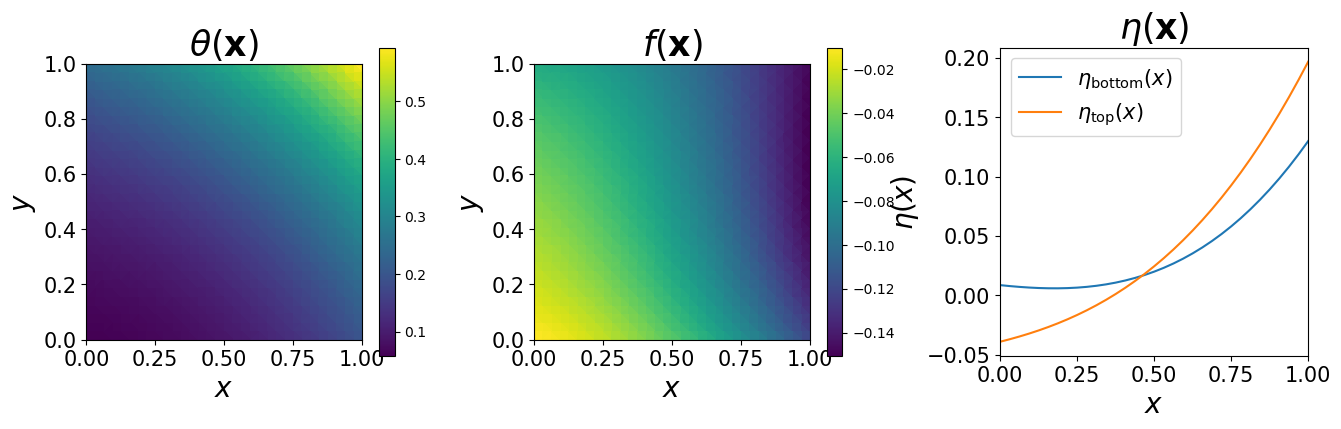

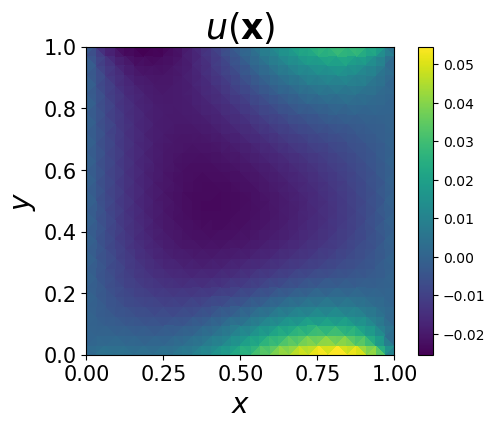

In [4]:
#plot
fig, axs = plt.subplots(1,3, figsize=(16, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.2)
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

ax = axs[0]
plot0 = ax.tripcolor(x[:,0], x[:,1], theta(x[:,0],x[:,1]))
ax.set_title(r"$\theta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)

ax = axs[1]
plot1 = ax.tripcolor(x[:,0], x[:,1], f(x[:,0],x[:,1]))
ax.set_title(r"$f(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)

ax = axs[2]
ax.plot(x[:,0], etab(x[:,0]), label=r'$\eta_\mathrm{bottom}(x)$')
ax.plot(x[:,0], etat(x[:,0]), label=r'$\eta_\mathrm{top}(x)$')
ax.set_title(r"$\eta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$\eta(x)$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.legend(fontsize=15)
ax.set_box_aspect(1)

# plt.savefig("heatconduction_theta_f_eta.svg", bbox_inches='tight')

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], u)
ax.set_title(r"$u(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

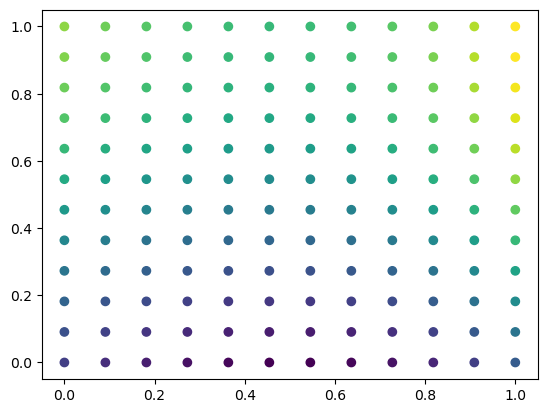

In [20]:
X, Y = np.mgrid[0:1:12j, 0:1:12j]
positions = np.vstack([X.ravel(), Y.ravel()])
plt.scatter(positions[0],positions[1], c=f(positions[0],positions[1]))

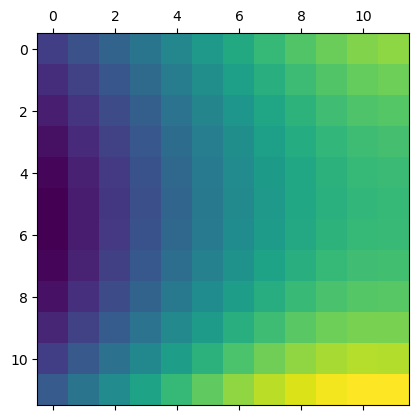

In [21]:
plt.matshow(f(positions[0],positions[1]).reshape(12,12))

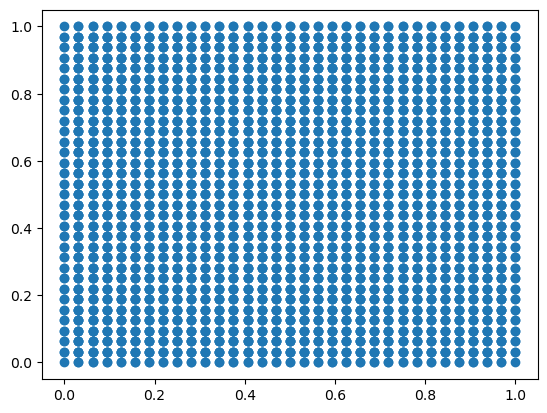

In [23]:
plt.scatter(x[:,0],x[:,1])

In [34]:
x_sensor, y_sensor = np.mgrid[0:1:12j, 0:1:12j]
sensornodes_Omega = np.vstack([x_sensor.ravel(), y_sensor.ravel()]).T
theta_sampled = theta(sensornodes_Omega[:,0], sensornodes_Omega[:,1])
f_sampled  = f(sensornodes[:,0], sensornodes[:,1])

array([-0.03583249, -0.02643736, -0.01616429, -0.00535141,  0.00566312,
        0.01654118,  0.02694461,  0.03653528,  0.04497503,  0.05192574,
        0.05704925,  0.06000744, -0.04377561, -0.03392546, -0.023276  ,
       -0.01216539, -0.00093174,  0.01008678,  0.02055204,  0.03012589,
        0.0384702 ,  0.04524682,  0.05011761,  0.05274443, -0.05078348,
       -0.04047486, -0.02944556, -0.01803374, -0.00657754,  0.00458491,
        0.01511545,  0.02467596,  0.03292828,  0.03953427,  0.04415579,
        0.04645471, -0.05654568, -0.04577512, -0.03436253, -0.02264605,
       -0.01096382,  0.000346  ,  0.01094529,  0.0204959 ,  0.02865969,
        0.03509851,  0.03947423,  0.04144869, -0.06075177, -0.04951581,
       -0.03771647, -0.02569187, -0.01378017, -0.0023195 ,  0.00835199,
        0.01789617,  0.02597488,  0.03224999,  0.03638335,  0.03803683,
       -0.06309131, -0.0513865 , -0.03919694, -0.02686077, -0.01471613,
       -0.00310116,  0.00764599,  0.01718718,  0.02518428,  0.03